In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *

In [2]:
folder = 'DiodeBC/ExtDir+SimpleDiode/'
data_path = os.path.join(scratch, 'sims/', folder)

In [3]:
infile   = os.path.join(data_path, 'metal_uniform.in')
dom_min, dom_max, ncells = getdomain(infile)
fac = 1
zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

In [8]:
output_folder = os.path.join(fig_path, folder, 'OutflowRate/')
os.chdir(output_folder)

In [9]:
list_file = glob.glob("*.h5")

In [10]:
timestep = np.zeros(len(list_file))
tot_mass_flux = np.zeros((len(list_file), zrange.shape[0]))
pos_mass_flux = np.zeros((len(list_file), zrange.shape[0]))
neg_mass_flux = np.zeros((len(list_file), zrange.shape[0]))
for i in range(len(list_file)):
    hf = h5py.File(list_file[i] ,'r')
    timestep[i] = np.array(hf.get("Timestep")) 
    tot_mass_flux[i] = np.array(hf.get("TotalOutflowRate"))
    pos_mass_flux[i] = np.array(hf.get("PosOutflowRate"))
    neg_mass_flux[i] = np.array(hf.get("NegOutflowRate"))

In [11]:
zrange.shape

(256,)

Text(0.5, 0, 'Time [Myr]')

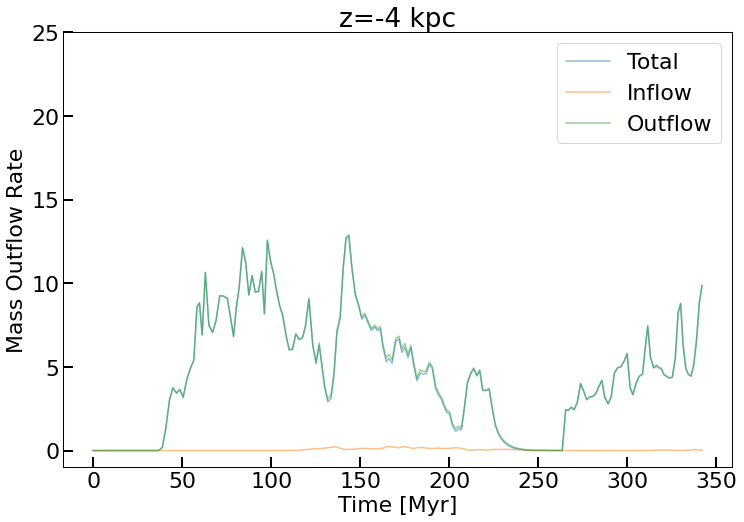

In [12]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
munit = yr_to_sec/Msun/1.e-4
index = 0
listarr = [tot_mass_flux[:,index], neg_mass_flux[:,index], pos_mass_flux[:,index]]
label = ['Total', 'Inflow', 'Outflow']
i = 0
for arr in listarr:
    tt = timestep 
    indexes = list(range(len(tt)))
    indexes.sort(key=tt.__getitem__)
    sorted_time = list(map(tt.__getitem__, indexes))
    sorted_mdot  = list(map(arr.__getitem__, indexes))
    ax.plot(sorted_time, np.abs(sorted_mdot)*munit, '-', label=label[i], alpha=0.5, markersize=12)
    i+=1


ax.legend()
ax.set_title('z=%d'%(zrange[index]/kpc) + ' kpc')
# ax.set_yscale('Symlog', linthresh=1.e15)
ax.set_ylim(-1,25.)
ax.set_ylabel("Mass Outflow Rate")
ax.set_xlabel('Time [Myr]')
# ax.set_xlim(0.0,200.)

In [13]:
zrange[95]/kpc

-1.0196078431372548

Text(0.5, 0, 'Time [Myr]')

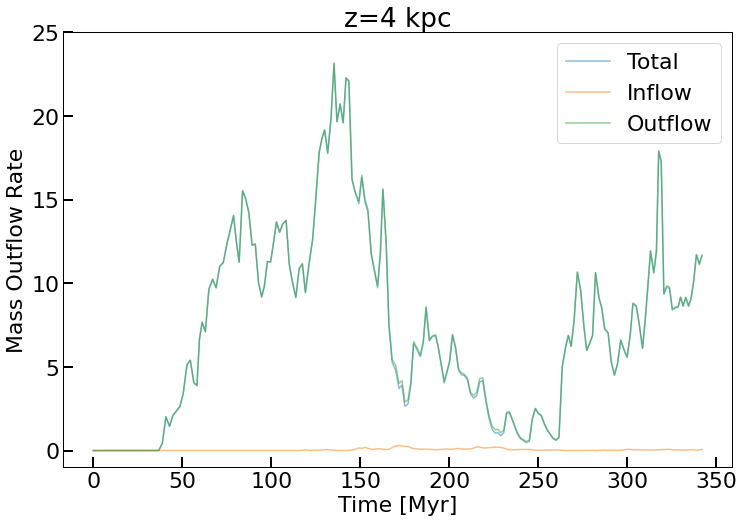

In [14]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
munit = yr_to_sec/Msun/1.e-4
index = -1
listarr = [tot_mass_flux[:,index], neg_mass_flux[:,index], pos_mass_flux[:,index]]
label = ['Total', 'Inflow', 'Outflow']
i = 0
for arr in listarr:
    tt = timestep 
    indexes = list(range(len(tt)))
    indexes.sort(key=tt.__getitem__)
    sorted_time = list(map(tt.__getitem__, indexes))
    sorted_mdot  = list(map(arr.__getitem__, indexes))
    ax.plot(sorted_time, np.abs(sorted_mdot)*munit, '-', label=label[i], alpha=0.5, markersize=12)
    i+=1


ax.legend()
ax.set_title('z=%d'%(zrange[index]/kpc) + ' kpc')
# ax.set_yscale('Symlog', linthresh=1.e15)
ax.set_ylim(-1,25.)
ax.set_ylabel("Mass Outflow Rate")
ax.set_xlabel('Time [Myr]')
# ax.set_xlim(0.0,200.)

Text(0.5, 0, 'Time [Myr]')

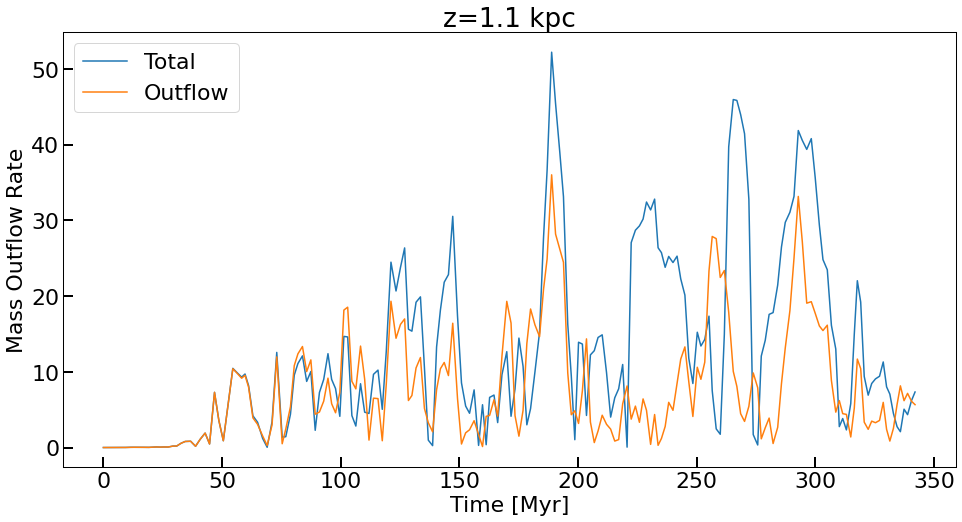

In [15]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(16, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
munit = yr_to_sec/Msun/1.e-4
index = 95
net_mass_flux = pos_mass_flux - np.abs(neg_mass_flux)
avg_tot = (tot_mass_flux[:,index] + tot_mass_flux[:,-index])/2.
avg_pos = (pos_mass_flux[:,index] + pos_mass_flux[:,-index])/2.
listarr = [avg_tot, avg_pos]
label = ['Total',  'Outflow', 'Net']
i = 0
for arr in listarr:
    tt = timestep 
    indexes = list(range(len(tt)))
    indexes.sort(key=tt.__getitem__)
    sorted_time = list(map(tt.__getitem__, indexes))
    sorted_mdot  = list(map(arr.__getitem__, indexes))
    ax.plot(sorted_time, np.abs(sorted_mdot)*munit, '-', label=label[i], markersize=12)
    i+=1


ax.legend(loc='upper left')
ax.set_title('z=%.1f'%(zrange[-index]/kpc) + ' kpc')
# ax.set_yscale('log')
# ax.set_ylim(-1,25.)
ax.set_ylabel("Mass Outflow Rate")
ax.set_xlabel('Time [Myr]')
# ax.set_xlim(0.0,200.)

Text(0.5, 0, 'Time [Myr]')

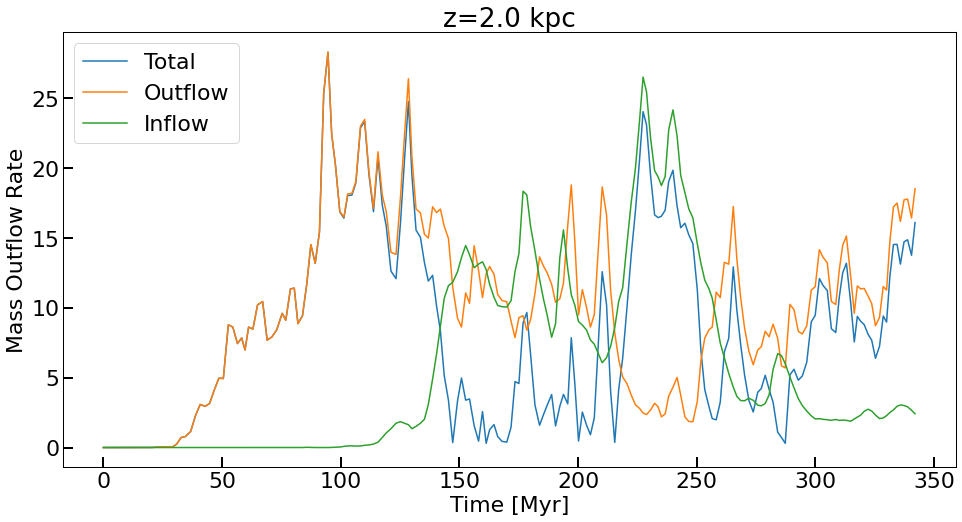

In [18]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(16, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
munit = yr_to_sec/Msun/1.e-4
index = 65
net_mass_flux = pos_mass_flux - np.abs(neg_mass_flux)
avg_tot = (tot_mass_flux[:,index] + 0.0*tot_mass_flux[:,-index])/2.
avg_pos = (pos_mass_flux[:,index] + 0.0*pos_mass_flux[:,-index])/2.
avg_neg = (neg_mass_flux[:,index] + 0.0*neg_mass_flux[:,-index])/2.
listarr = [avg_tot, avg_pos, avg_neg]
label = ['Total',  'Outflow', 'Inflow']
i = 0
for arr in listarr:
    tt = timestep 
    indexes = list(range(len(tt)))
    indexes.sort(key=tt.__getitem__)
    sorted_time = list(map(tt.__getitem__, indexes))
    sorted_mdot  = list(map(arr.__getitem__, indexes))
    ax.plot(sorted_time, np.abs(sorted_mdot)*munit, '-', label=label[i], markersize=12)
    i+=1


ax.legend(loc='upper left')
ax.set_title('z=%.1f'%(zrange[-index]/kpc) + ' kpc')
# ax.set_yscale('log')
# ax.set_ylim(-1,25.)
ax.set_ylabel("Mass Outflow Rate")
ax.set_xlabel('Time [Myr]')
# ax.set_xlim(0.0,200.)